In [3]:
from tinylang.experiment import Experiment

nnsight is not detected. Please install via 'pip install nnsight' for nnsight backend.


In [6]:
import yaml
import pyvene as pv
import os
import pandas as pd
import torch
import numpy as np
import plotnine as p9

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [134]:
@torch.no_grad()
def get_model_per_distance(name):
    config_path = f"/nlp/scr/aryaman/tinylang/experiments/configs/{name}.yaml"
    model_path = f"/nlp/scr/aryaman/tinylang/experiments/logs/{name}/model.pt"
    with open(config_path, 'r') as f:
        config = yaml.safe_load(f)
        config["training"]["log_dir"] = "."

    # load model
    exp = Experiment.from_config(
        config=config
    )
    exp.model.load(model_path)
    exp.verbose = True
    exp.model.model.to(device)
    exp.model.model.eval()

    # eval on all data
    full_eval_length = len(exp.language.stats["test"]["query_orig_target_orig_dist"])
    exp.training_config.num_eval_steps = int(full_eval_length / exp.training_config.eval_batch_size)
    exp.training_config.__dict__

    # run eval step
    exp.eval_step(0, split="test", evaluators=exp.evaluators["test"])
    print(len(exp.evaluators["test"][1].all_eval_stats[0]["1.PARENT.query_item_orig.target_item_orig.block_input.restored_prob"]))
    print(len(exp.language.stats["test"]["query_orig_target_orig_dist"]))
    data = {
        "dist": exp.language.stats["test"]["query_orig_target_orig_dist"],
        "pred_prob": exp.evaluators["test"][0].all_eval_stats[0]["PARENT.query_item.pred_prob"],
    }
    if "1.PARENT.query_item_orig.query_item.block_input.restored_prob" in exp.evaluators["test"][1].all_eval_stats[0]:
        data.update({
            "induction": exp.evaluators["test"][1].all_eval_stats[0]["1.PARENT.query_item_orig.target_item_orig.block_input.restored_prob"],
            "direct (early)": exp.evaluators["test"][1].all_eval_stats[0]["1.PARENT.query_item_orig.query_item.block_input.restored_prob"],
            "direct (late)": exp.evaluators["test"][1].all_eval_stats[0]["1.PARENT.query_item_orig.query_item_orig.block_input.restored_prob"]
        })
    df = pd.DataFrame(data)
    df["model"] = name
    return df

In [135]:
models = [
    "pcfg_easy_1L/mamba___256___1e-03",
    "pcfg_easy_nope/mamba___128___1e-03",
    "pcfg_easy/attention___256___1e-04",
    "pcfg_easy_nope/based___128___3e-03",
]

df = pd.concat([get_model_per_distance(m) for m in models])

hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
Model size: 445184


Post-evals: 100%|██████████| 2/2 [00:00<00:00, 520.61it/s]


             PARENT.query_item.pred_prob: 93.77912%
                    query_item.pred_prob: 93.77912%
0
1024
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
hi mamba!
Model size: 236800


Post-evals: 100%|██████████| 2/2 [00:00<00:00, 353.49it/s]


             PARENT.query_item.pred_prob: 96.48852%
                    query_item.pred_prob: 96.48852%
1024
1024
Model size: 1847296


Post-evals: 100%|██████████| 2/2 [00:00<00:00, 411.57it/s]


             PARENT.query_item.pred_prob: 95.48263%
                    query_item.pred_prob: 95.48263%
1024
1024
Model size: 319872


Post-evals: 100%|██████████| 2/2 [00:00<00:00, 356.26it/s]


             PARENT.query_item.pred_prob: 92.50595%
                    query_item.pred_prob: 92.50595%
1024
1024


In [136]:
df

,dist,pred_prob,model,induction,direct (early),direct (late)
0,2,1.000000,pcfg_easy_1L/mamba___256___1e-03,NaN,NaN,NaN
1,4,0.000052,pcfg_easy_1L/mamba___256___1e-03,NaN,NaN,NaN
2,1,1.000000,pcfg_easy_1L/mamba___256___1e-03,NaN,NaN,NaN
3,2,1.000000,pcfg_easy_1L/mamba___256___1e-03,NaN,NaN,NaN
4,2,1.000000,pcfg_easy_1L/mamba___256___1e-03,NaN,NaN,NaN
...,...,...,...,...,...,...
1019,1,1.000000,pcfg_easy_nope/based___128___3e-03,1.0,0.999972,9.999995e-01
1020,3,1.000000,pcfg_easy_nope/based___128___3e-03,1.0,1.000000,1.000000e+00
1021,3,1.000000,pcfg_easy_nope/based___128___3e-03,1.0,1.000000,1.000000e+00
1022,1,1.000000,pcfg_easy_nope/based___128___3e-03,1.0,0.000011,9.998912e-01


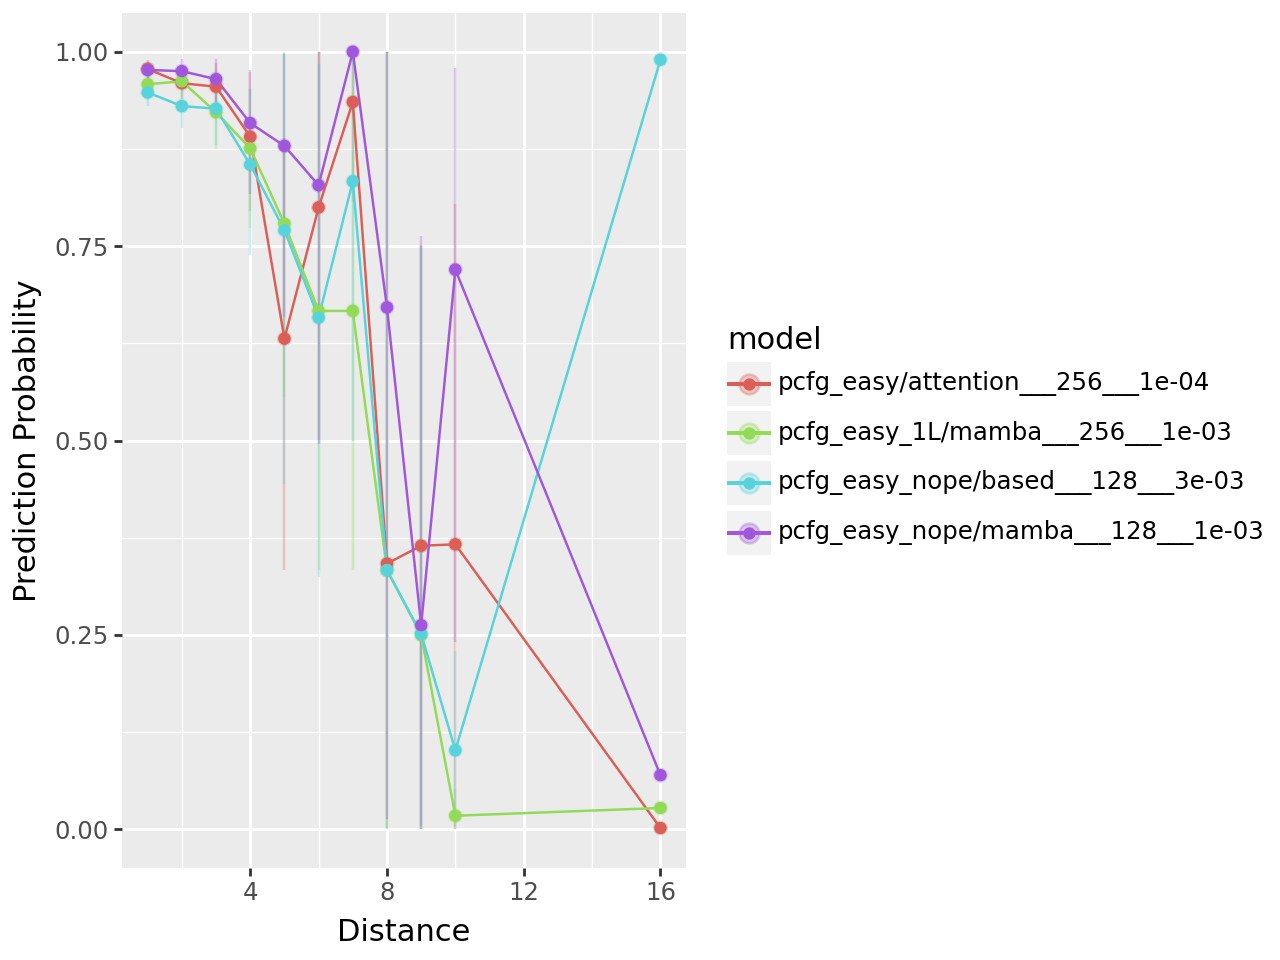

In [141]:
plot = (
    p9.ggplot(df, p9.aes(x="dist", y="pred_prob", color="model"))
    + p9.stat_summary(alpha=0.3)
    + p9.stat_summary(geom="line")
    + p9.stat_summary(geom="point")
    + p9.labs(x="Distance", y="Prediction Probability")
)
plot


In [142]:
from tinylang.model import Model, Zoology, LanguageModel

In [146]:
list(pv.type_to_module_mapping[LanguageModel].keys())

['block_input',
 'block_output',
 'attention_input',
 'attention_output',
 'mlp_input',
 'mlp_output',
 'final_layernorm_input']

In [ ]:
name = "pcfg_easy_1L/mamba___256___1e-03"
config_path = f"/nlp/scr/aryaman/tinylang/experiments/configs/{name}.yaml"
model_path = f"/nlp/scr/aryaman/tinylang/experiments/logs/{name}/model.pt"
with open(config_path, 'r') as f:
    config = yaml.safe_load(f)
    config["training"]["log_dir"] = "."

# load model
exp = Experiment.from_config(
    config=config
)
exp.model.load(model_path)
exp.verbose = True
exp.model.model.to(device)
exp.model.model.eval()

In [149]:
exp.model.model

LanguageModel(
  (backbone): LMBackbone(
    (embeddings): TokenEmbeddings(
      (word_embeddings): Embedding(26, 256)
    )
    (layers): Sequential(
      (0): MambaBlock(
        (sequence_mixer): Mamba(
          (in_proj): Linear(in_features=256, out_features=1024, bias=False)
          (conv1d): Conv1d(512, 512, kernel_size=(4,), stride=(1,), padding=(3,), groups=512)
          (act): SiLU()
          (x_proj): Linear(in_features=512, out_features=48, bias=False)
          (dt_proj): Linear(in_features=16, out_features=512, bias=True)
          (out_proj): Linear(in_features=512, out_features=256, bias=False)
        )
        (norm): RMSNorm()
      )
    )
    (drop_path_i): StochasticDepth(p=0.0, mode=row)
    (drop_i): Dropout(p=0.0, inplace=False)
    (ln_f): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=256, out_features=26, bias=False)
)